Study Hours    0
Attendance     0
Pass           0
dtype: int64


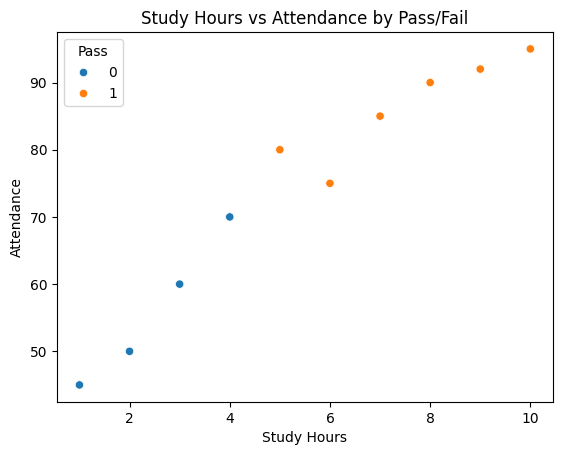

Accuracy: 1.00


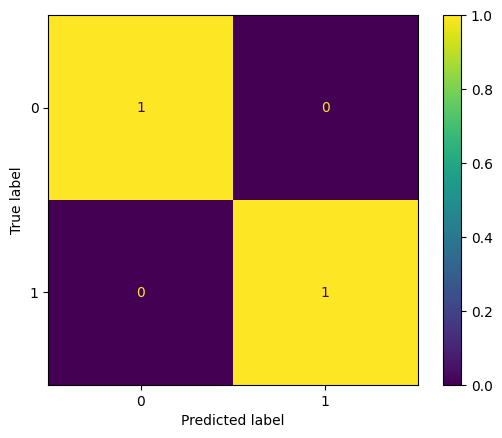

In [2]:
#Task 1: Student Pass/Fail Prediction
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Sample dataset
data = {
    'Study Hours': [5, 10, 3, 8, 7, 2, 6, 9, 1, 4],
    'Attendance': [80, 95, 60, 90, 85, 50, 75, 92, 45, 70],
    'Pass': [1, 1, 0, 1, 1, 0, 1, 1, 0, 0]
}
df = pd.DataFrame(data)

# Check for missing values
print(df.isnull().sum())

# Plotting
sns.scatterplot(x='Study Hours', y='Attendance', hue='Pass', data=df)
plt.title('Study Hours vs Attendance by Pass/Fail')
plt.show()

# Split data
X = df[['Study Hours', 'Attendance']]
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [12]:
#Task 2: Sentiment Analysis with Natural Language Processing
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Sample dataset
data = {
    'Review Text': [
        "I love this product! It's amazing.",
        "Worst service ever. Totally disappointed.",
        "The quality is decent, not the best though.",
        "Absolutely fantastic experience!",
        "Terrible packaging and delayed delivery.",
        "I'm really happy with the results!",
        "This was a complete waste of money.",
        "Excellent customer support.",
        "Poor quality and not worth the price.",
        "Great value for the price!"
    ],
    'Sentiment': [
        'positive', 'negative', 'positive', 'positive', 'negative',
        'positive', 'negative', 'positive', 'negative', 'positive'
    ]
}
df = pd.DataFrame(data)

# Preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['Cleaned Review'] = df['Review Text'].apply(preprocess_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned Review'])
y = df['Sentiment']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Evaluation Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


Classification Report:

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

